<a href="https://colab.research.google.com/github/Aakash326/ML-models/blob/main/car_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
df=pd.read_csv('/content/Car details v3.csv')


In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [ ]:
df.isnull().sum()

,0
name,0
year,0
selling_price,0
km_driven,0
fuel,0
seller_type,0
transmission,0
owner,0
mileage,221
engine,221


In [ ]:
df['engine'].dtype

dtype('O')

In [ ]:
df.shape

(8128, 13)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(7906, 13)

In [ ]:
df['year'].dtype

dtype('int64')

In [ ]:
df.drop('name',axis=1,inplace=True)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
df['fuel']=oe.fit_transform(df[['fuel']])
df['seller_type']=oe.fit_transform(df[['seller_type']])
df['transmission']=oe.fit_transform(df[['transmission']])
df['owner']=oe.fit_transform(df[['owner']])
# df['mileage']=oe.fit_transform(df[['mileage']])
# df['engine']=oe.fit_transform(df[['engine']])
df['max_power']=oe.fit_transform(df[['max_power']])
df['torque']=oe.fit_transform(df[['torque']])

In [ ]:
# For numerical columns, use this instead of OrdinalEncoder:
df['mileage'] = df['mileage'].str.extract('(\d+\.?\d*)').astype(float)
df['engine'] = df['engine'].str.extract('(\d+)').astype(float)
# Similar for max_power and torque

<Axes: >

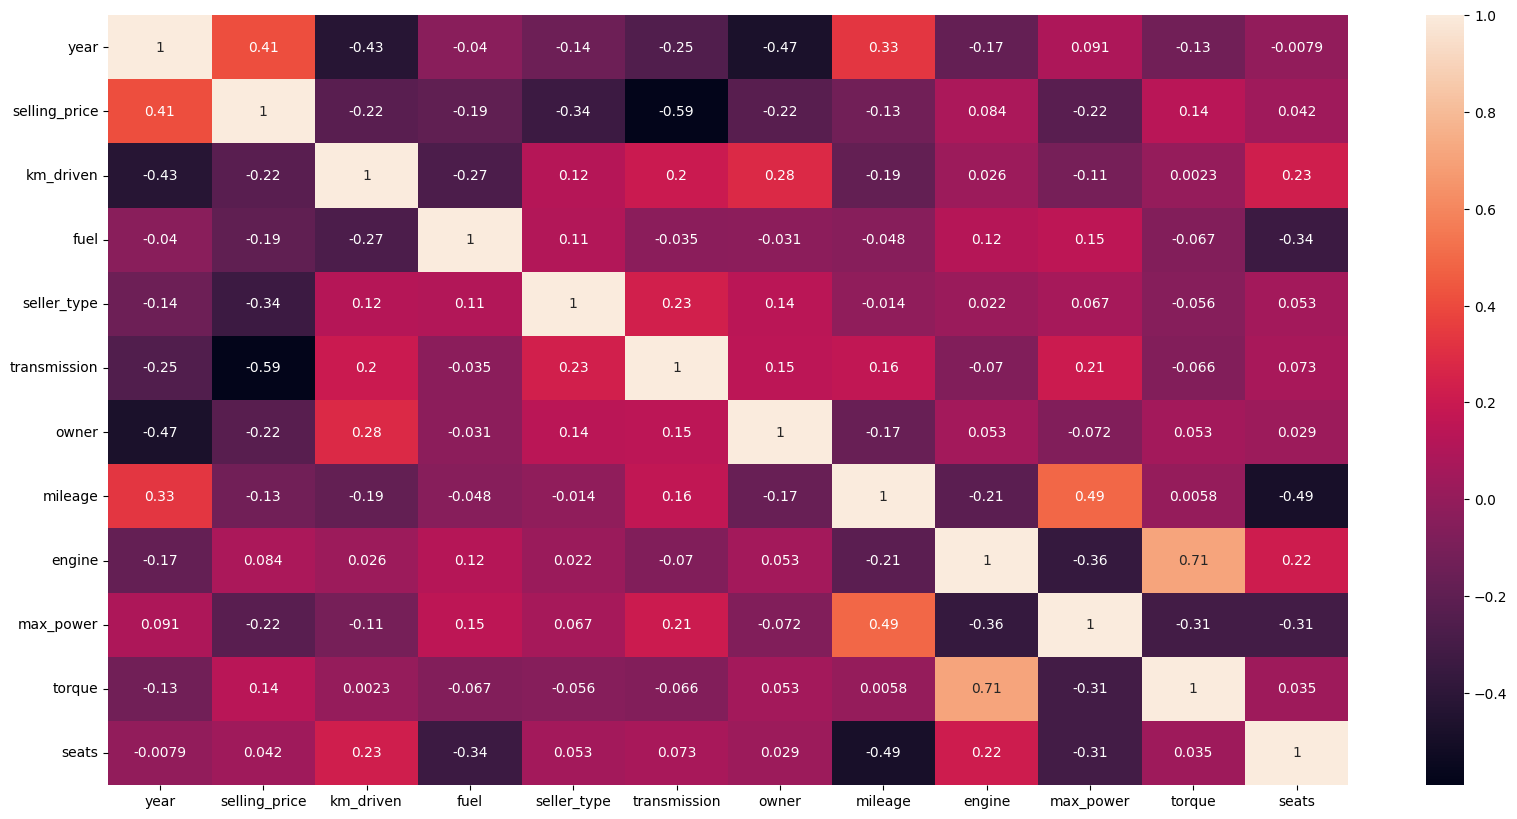

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [ ]:
x=df.drop('selling_price',axis=1)
y=df['selling_price']

In [ ]:
for col in x.columns:
    Q1 = x[col].quantile(0.25)
    Q3 = x[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    x[col] = np.where(x[col] < lower, lower,
                      np.where(x[col] > upper, upper, x[col]))

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
scaler = StandardScaler()
x_train_norm = scaler.fit_transform(x_train)
x_test_norm = scaler.transform(x_test)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
# from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    loss=tf.keras.losses.mae,
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
    metrics=['mae']
)
model.fit(x_train_norm,y_train,epochs=300)

Epoch 1/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 518957.4062 - mae: 518957.4062
Epoch 2/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 230684.0312 - mae: 230684.0312
Epoch 3/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 229778.6562 - mae: 229778.6562
Epoch 4/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 222548.8125 - mae: 222548.8125
Epoch 5/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 217839.9219 - mae: 217839.9219
Epoch 6/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 206730.5938 - mae: 206730.5938
Epoch 7/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 200626.7500 - mae: 200626.7500
Epoch 8/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 200753.1719 - mae: 200753.1719
Epoch 9/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 192517.2656 - mae: 192517.2656
Epoch 10/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 182354.0156 - mae: 182354.0156
Epoch 11/300
173/173 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 176164.4844 - ma

In [ ]:
model.evaluate(x_test_norm,y_test)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 81943.8750 - mae: 81943.8750


[82599.28125, 82599.28125]

In [ ]:
y_pred=model.predict(x_test_norm)

75/75 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [ ]:
r2_score(y_test,y_pred)

0.9627623558044434

In [ ]:
# Install xgboost if not already installed
!pip install xgboost

# Import XGBoostRegressor
from xgboost import XGBRegressor

# Initialize and train the XGBoost regressor
xg = XGBRegressor()
xg.fit(x_train_norm, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred=xg.predict(x_test_norm)
r2_score(y_test,y_pred)

0.9752494692802429